In [1]:
%matplotlib inline

import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import scanpy as sc

# settings
plt.rc('font', size = 9)
plt.rc('font', family='sans serif')
plt.rcParams['pdf.fonttype']=42
plt.rcParams['ps.fonttype']=42
plt.rcParams['text.usetex']=False
plt.rcParams['legend.frameon']=False
plt.rcParams['axes.grid']=False
plt.rcParams['legend.markerscale']=0.5
plt.rcParams['savefig.dpi']=600
sns.set_style("ticks")

In [26]:
# load old data
adata = sc.read('/home/ngr4/project/scnd/data/processed/mouse_200614.h5ad')
ubc_dcn = sc.read('/home/ngr4/project/scnd/data/processed/ubc.h5ad')
ubc = sc.read('/home/ngr4/project/scnd/data/processed/ubc_210421.h5ad')

In [35]:
# udpate naming for UBCs
# rename ON --> DCN, OFF --> UBC
ubc_dcn.obs['new_ubc_ctypes'] = ubc_dcn.obs['ubc_subtype'].astype(str)
ubc_dcn.obs.loc[ubc_dcn.obs['ubc_subtype']=='OFF', 'new_ubc_ctypes'] = 'UBC'
ubc_dcn.obs.loc[ubc_dcn.obs['ubc_subtype']=='ON', 'new_ubc_ctypes'] = 'DCN'

ubc.obs['ubc_subtype'] = ubc.obs['subtype'].astype(str)
ubc.obs.loc[ubc.obs['subtype']=='None', 'ubc_subtype'] = 'Intermediate'

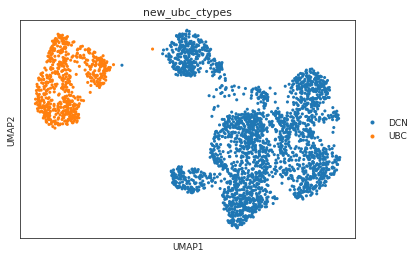

In [30]:
sc.pl.umap(ubc_dcn, color=['new_ubc_ctypes'])

... storing 'ubc_subtype' as categorical


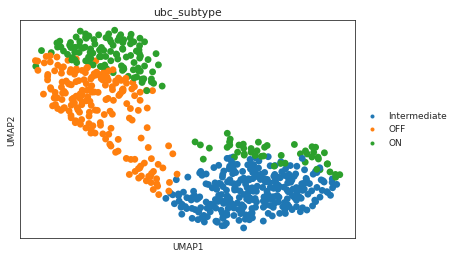

In [36]:
sc.pl.umap(ubc, color=['ubc_subtype'])

In [57]:
# strip trailing WTimp from ubc
import re
ubc.obs.index = [re.sub(r'-[\w]*imp', '', i) for i in ubc.obs.index]
ubc_dcn.obs.index = [re.sub(r'-[\w]*imp', '', i) for i in ubc_dcn.obs.index]

# slow but sure change of name
adata.obs = adata.obs.merge(ubc.obs.loc[:, ['ubc_subtype']], left_index=True, right_index=True, how='left')
adata.obs = adata.obs.merge(ubc_dcn.obs.loc[:, ['new_ubc_ctypes']], left_index=True, right_index=True, how='left')

In [50]:
# chk
ubc.obs['ubc_subtype'].value_counts(dropna=False)

Intermediate    286
OFF             193
ON              162
Name: ubc_subtype, dtype: int64

In [58]:
# chk
ubc_dcn.obs['new_ubc_ctypes'].value_counts(dropna=False)

DCN    2513
UBC     641
Name: new_ubc_ctypes, dtype: int64

In [61]:
# chk
adata.obs['new_ubc_ctypes'].value_counts(dropna=False)

NaN    315158
DCN      2513
UBC       641
Name: new_ubc_ctypes, dtype: int64

In [62]:
# chk
adata.obs['ubc_subtype'].value_counts(dropna=False)

NaN             317671
Intermediate       286
OFF                193
ON                 162
Name: ubc_subtype, dtype: int64

In [63]:
adata.obs.ctype.unique()

['Bergmann glia', 'Granule cell', 'Astrocyte', 'Oligodendrocyte', 'Unipolar brush cell', ..., 'Endothelial cell', 'Pericyte', 'Purkinje cell', 'GABAergic interneuron 3', 'Oligodendrocyte progenitor cell']
Length: 13
Categories (13, object): ['Bergmann glia', 'Granule cell', 'Astrocyte', 'Oligodendrocyte', ..., 'Pericyte', 'Purkinje cell', 'GABAergic interneuron 3', 'Oligodendrocyte progenitor cell']

In [64]:
# update adata ctypes
adata.obs['ctype_ubcupdate'] = adata.obs['ctype'].astype(str)
adata.obs.loc[adata.obs['ctype']=='Unipolar brush cell', 'ctype_ubcupdate'] = 'None'
adata.obs.loc[adata.obs['new_ubc_ctypes']=='UBC', 'ctype_ubcupdate'] = 'Unipolar brush cell'
adata.obs.loc[adata.obs['new_ubc_ctypes']=='DCN', 'ctype_ubcupdate'] = 'Deep cerebellar nuclei'

... storing 'new_ubc_ctypes' as categorical
... storing 'ctype_ubcupdate' as categorical


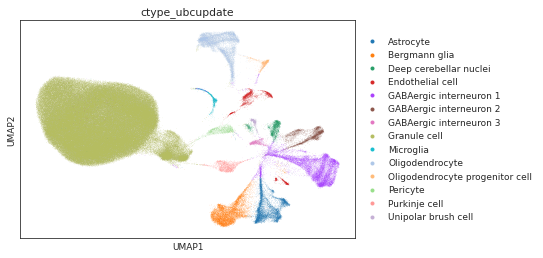

In [65]:
sc.pl.umap(adata, color='ctype_ubcupdate')

Text(0, 0.5, 'Cell counts')

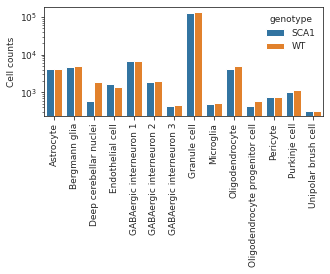

In [73]:
fig, ax = plt.subplots(1, 1, figsize=(5, 2))
sns.barplot(x='ctype_ubcupdate', y='batch',
            data=adata.obs.groupby(['genotype', 'ctype_ubcupdate']).count().reset_index(), hue='genotype',
            ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yscale('log')
ax.set_xlabel('')
ax.set_ylabel('Cell counts')

In [74]:
# save data and metadata
adata.obs.to_csv('/home/ngr4/project/scnd/results/adata.obs_210726.csv')
adata.write('/home/ngr4/project/scnd/data/processed/mouse_210726.h5ad')

In [78]:
for i, f in enumerate(glob.glob('/home/ngr4/project/scnd/data/processed/*h5ad')):
    print('File #{}: {}'.format(i+1, f))

File #1: /home/ngr4/project/scnd/data/processed/hum_ctrl.h5ad
File #2: /home/ngr4/project/scnd/data/processed/hum_wsca3.h5ad
File #3: /home/ngr4/project/scnd/data/processed/ubc.h5ad
File #4: /home/ngr4/project/scnd/data/processed/mouse_200614.h5ad
File #5: /home/ngr4/project/scnd/data/processed/hum_sca1.h5ad
File #6: /home/ngr4/project/scnd/data/processed/hum_wt_imputed.h5ad
File #7: /home/ngr4/project/scnd/data/processed/adata_and_loom_2110514.h5ad
File #8: /home/ngr4/project/scnd/data/processed/astrocyte_210519.h5ad
File #9: /home/ngr4/project/scnd/data/processed/mouse_wt_imputed.h5ad
File #10: /home/ngr4/project/scnd/data/processed/hum_sca1_imputed.h5ad
File #11: /home/ngr4/project/scnd/data/processed/mouse_210726.h5ad
File #12: /home/ngr4/project/scnd/data/processed/mouse_sca1_imputed.h5ad
File #13: /home/ngr4/project/scnd/data/processed/ubc_210421.h5ad
File #14: /home/ngr4/project/scnd/data/processed/hum_MT_bbknn.h5ad
File #15: /home/ngr4/project/scnd/data/processed/hum_sca3.h5ad
